📊 Summary Statistics Grouped by Age Group:
              mean   median    min    max          std
Age_Group                                             
18-25      24000.0  24000.0  23000  25000  1000.000000
26-35      50000.0  50000.0  48000  52000  2000.000000
36-45      60500.0  60500.0  60000  61000   707.106781
46-60      56000.0  56000.0  55000  57000  1414.213562

📋 Income Values by Age Group:
18-25: [25000, 24000, 23000]
26-35: [50000, 52000, 48000]
36-45: [60000, 61000]
46-60: [55000, 57000]

❓ Missing Values in Iris Dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


C:\Users\SAINATH\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


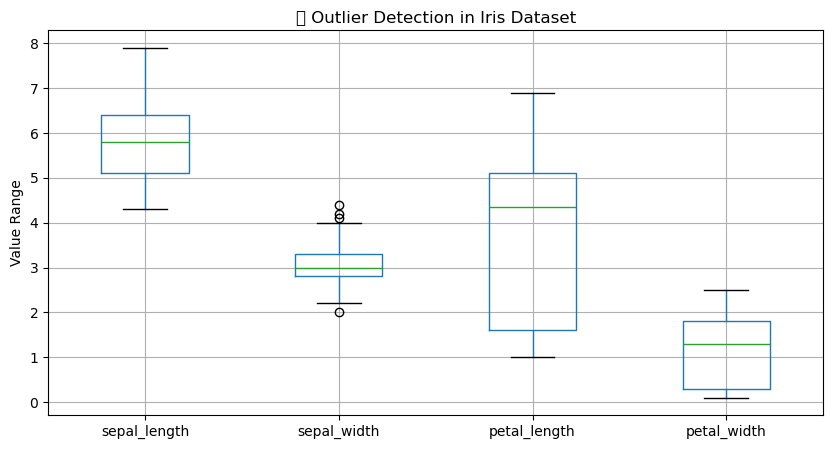


📈 Descriptive Statistics Grouped by Species:
species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    0.196111    0.454444   0.635556
             std     0.097914    0.143381   0.176633
             min     0.000000    0.166667   0.166667
             25%     0.138889    0.361111   0.534722
             50%     0.194444    0.444444   0.611111
             75%     0.250000    0.555556   0.722222
             max     0.416667    0.750000   1.000000
sepal_width  count  50.000000   50.000000  50.000000
             mean    0.595000    0.320833   0.405833
             std     0.157943    0.130749   0.134374
             min     0.125000    0.000000   0.083333
             25%     0.500000    0.218750   0.333333
             50%     0.583333    0.333333   0.416667
             75%     0.697917    0.416667   0.489583
             max     1.000000    0.583333   0.750000
petal_length count  50.000000   50.000000  50.000000


In [2]:
# -------------------------------------------
# Problem Statement:
# 3. Descriptive Statistics - Measures of Central Tendency and Variability
# Perform the following operations on any open-source dataset (e.g., data.csv):
# 1. Provide summary statistics (mean, median, minimum, maximum, standard deviation)
#    for a dataset (e.g., age, income) with numeric variables grouped by a qualitative (categorical) variable.
#    Example: If the categorical variable is age group and the quantitative variable is income,
#    then provide summary statistics of income grouped by age group. Also, create a list of numeric values for each group.
# 2. Write a Python program to display statistical details like percentile, mean, std deviation, etc.
#    for species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-virginica’ using the iris dataset.
# -------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Sample Dataset: Categorical variable = Age_Group, Numeric variable = Income
data = {
    'Age_Group': ['18-25', '26-35', '36-45', '26-35', '36-45', '18-25', '18-25', '46-60', '46-60', '26-35'],
    'Income': [25000, 50000, 60000, 52000, 61000, 24000, 23000, 55000, 57000, 48000]
}
df = pd.DataFrame(data)

# 1. Summary statistics (mean, median, min, max, std) grouped by Age_Group
grouped_stats = df.groupby('Age_Group')['Income'].agg(['mean', 'median', 'min', 'max', 'std'])
print("📊 Summary Statistics Grouped by Age Group:")
print(grouped_stats)

# 2. Create a dictionary where each Age_Group is mapped to the list of income values
income_by_group = df.groupby('Age_Group')['Income'].apply(list).to_dict()
print("\n📋 Income Values by Age Group:")
for group, values in income_by_group.items():
    print(f"{group}: {values}")

# -------------------------
# Part 2: Iris Dataset Analysis
# -------------------------

# Load built-in iris dataset using seaborn
iris = sns.load_dataset("iris")

# 1. Check for missing values in iris dataset
print("\n❓ Missing Values in Iris Dataset:")
print(iris.isnull().sum())

# 2. Boxplot to visually detect outliers in numeric columns
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].boxplot(figsize=(10, 5))
plt.title("📦 Outlier Detection in Iris Dataset")
plt.ylabel("Value Range")
plt.show()

# 3. Normalize numeric features using Min-Max Scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_scaled = iris.copy()  # Copy to preserve original
iris_scaled[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaled_values

# 4. Descriptive statistics grouped by species
print("\n📈 Descriptive Statistics Grouped by Species:")
stats_by_species = iris_scaled.groupby('species').describe().T  # Transposed for better readability
print(stats_by_species)

# 5. Display percentiles and basic statistics per species
for species in iris_scaled['species'].unique():
    print(f"\n📊 Percentile Summary for {species}:")
    species_data = iris_scaled[iris_scaled['species'] == species]
    print(species_data.describe(percentiles=[.25, .5, .75]))
